In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../dataset-nifty50/GAIL.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,NaN,NaN,NaN
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,NaN,NaN,NaN
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,NaN,NaN,NaN
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,NaN,NaN,NaN
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,NaN,NaN,NaN


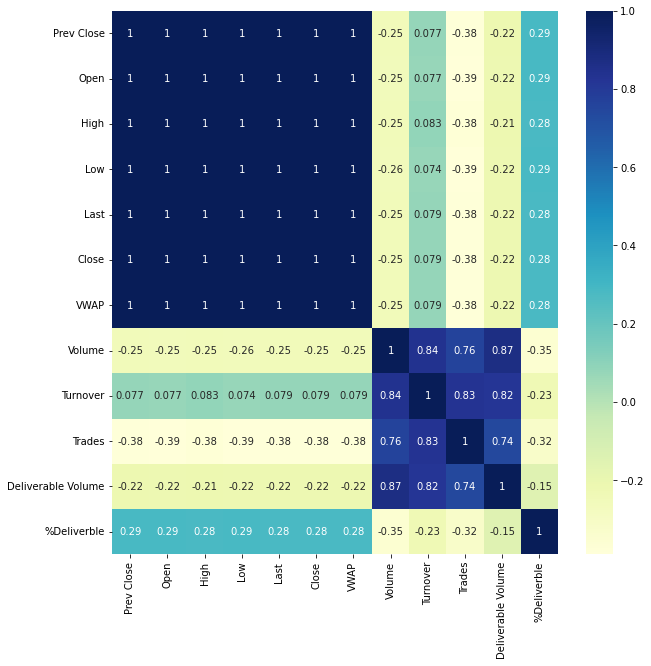

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [4]:
data = df[['Date','Open','High','Low','Volume','VWAP']]

In [5]:
df.set_index("Date", drop=False, inplace=True)

<AxesSubplot:xlabel='Date'>

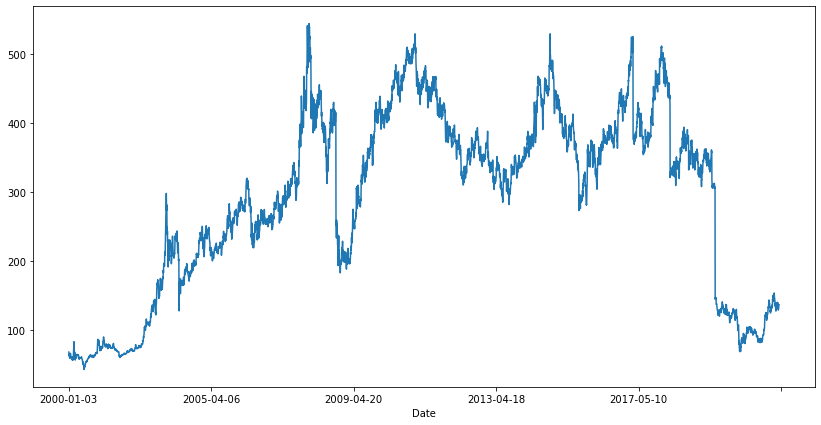

In [6]:
df.Close.plot(figsize=(14, 7))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4985 non-null   object 
 1   Open    4985 non-null   float64
 2   High    4985 non-null   float64
 3   Low     4985 non-null   float64
 4   Volume  4985 non-null   int64  
 5   VWAP    4985 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 233.8+ KB


In [8]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low","VWAP"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

In [9]:
df.fillna(df.mean(), inplace=True)


/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/ipykernel_1277/1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [10]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,...,1.364708e+06,0.527357,292.573486,6.652742,297.317688,6.169195,287.350037,6.266504,292.352478,5.918740
2000-01-04,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,...,1.364708e+06,0.527357,65.000000,6.652742,70.000000,6.169195,65.000000,6.266504,67.910004,5.918740
2000-01-05,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,...,1.364708e+06,0.527357,67.425003,3.429468,71.449997,2.050610,65.500000,0.707107,67.599998,0.438406
2000-01-06,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,...,1.364708e+06,0.527357,67.733330,2.483110,70.533333,2.150194,64.033333,2.589080,66.813332,1.397367
2000-01-07,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,...,1.364708e+06,0.527357,67.666664,2.502332,69.533333,2.490649,63.366665,2.176197,66.026665,1.304131


In [11]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,...,6.652742,297.317688,6.169195,287.350037,6.266504,292.352478,5.918740,1,3,0
2000-01-04,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,...,6.652742,70.000000,6.169195,65.000000,6.266504,67.910004,5.918740,1,4,1
2000-01-05,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,...,3.429468,71.449997,2.050610,65.500000,0.707107,67.599998,0.438406,1,5,2
2000-01-06,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,...,2.483110,70.533333,2.150194,64.033333,2.589080,66.813332,1.397367,1,6,3
2000-01-07,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,...,2.502332,69.533333,2.490649,63.366665,2.176197,66.026665,1.304131,1,7,4


In [12]:
df = df.drop(columns=['Symbol'])
df = df.drop(columns=['Series'])

In [13]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]
print(df_train.shape,df_valid.shape)

(4162, 24) (823, 24)


In [ ]:
!pip install keras tensorflow
import tensorflow
from sklearn.preprocessing import MinMaxScaler


In [15]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Prev Close,67.8,68.7,66.35,63.2,64.95
Open,65.0,69.85,68.35,64.8,65.9
High,70.0,72.9,68.7,67.0,65.9
Low,65.0,66.0,61.1,63.0,62.0
Last,68.8,67.0,63.0,64.75,62.9
Close,68.7,66.35,63.2,64.95,62.65
VWAP,67.91,67.29,65.24,65.55,63.76
Volume,76055,98097,92690,173654,86590
Turnover,516516560000.0,660045745000.0,604688925000.0,1138298685000.0,552138810000.0


In [16]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [17]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [18]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/ipykernel_25341/2834614213.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X_train2 = pd.concat((X_train1, X_train.Date), 1)


In [19]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/ipykernel_25341/3306476984.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)


In [20]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()

In [22]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

  Using cached xgboost-1.5.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.3 MB)


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/arungupta/opt/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/arungupta/opt/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [77]:
xgb = XGBRegressor(learning_rate=0.01)


In [78]:
xgb = XGBRegressor(max_depth=5)


In [79]:
xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.17733	validation_1-rmse:0.23258
[1]	validation_0-rmse:0.12459	validation_1-rmse:0.16430
[2]	validation_0-rmse:0.08754	validation_1-rmse:0.11538
[3]	validation_0-rmse:0.06155	validation_1-rmse:0.08104
[4]	validation_0-rmse:0.04332	validation_1-rmse:0.05714
[5]	validation_0-rmse:0.03053	validation_1-rmse:0.04027
[6]	validation_0-rmse:0.02157	validation_1-rmse:0.02847
[7]	validation_0-rmse:0.01531	validation_1-rmse:0.02036
[8]	validation_0-rmse:0.01096	validation_1-rmse:0.01478
[9]	validation_0-rmse:0.00796	validation_1-rmse:0.01094
[10]	validation_0-rmse:0.00594	validation_1-rmse:0.00856
[11]	validation_0-rmse:0.00461	validation_1-rmse:0.00704
[12]	validation_0-rmse:0.00374	validation_1-rmse:0.00609
[13]	validation_0-rmse:0.00323	validation_1-rmse:0.00558
[14]	validation_0-rmse:0.00291	validation_1-rmse:0.00538
[15]	validation_0-rmse:0.00272	validation_1-rmse:0.00527
[16]	validation_0-rmse:0.00260	validation_1-rmse:0.00508
[17]	validation_0-rmse:0.00251	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [80]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:0.25001	validation_1-rmse:0.32515
[1]	validation_0-rmse:0.24753	validation_1-rmse:0.32199
[2]	validation_0-rmse:0.24507	validation_1-rmse:0.31885
[3]	validation_0-rmse:0.24264	validation_1-rmse:0.31575
[4]	validation_0-rmse:0.24023	validation_1-rmse:0.31269
[5]	validation_0-rmse:0.23784	validation_1-rmse:0.30965
[6]	validation_0-rmse:0.23548	validation_1-rmse:0.30664
[7]	validation_0-rmse:0.23314	validation_1-rmse:0.30366
[8]	validation_0-rmse:0.23083	validation_1-rmse:0.30071
[9]	validation_0-rmse:0.22853	validation_1-rmse:0.29779
[10]	validation_0-rmse:0.22627	validation_1-rmse:0.29489
[11]	validation_0-rmse:0.22402	validation_1-rmse:0.29203
[12]	validation_0-rmse:0.22179	validation_1-rmse:0.28920
[13]	validation_0-rmse:0.21959	validation_1-rmse:0.28638
[14]	validation_0-rmse:0.21741	validation_1-rmse:0.28360
[15]	validation_0-rmse:0.21526	validation_1-rmse:0.28083
[16]	validation_0-rmse:0.21312	validation_1-rmse:0.27810
[17]	validation_0-rmse:0.21100	validation

[144]	validation_0-rmse:0.05955	validation_1-rmse:0.07809
[145]	validation_0-rmse:0.05896	validation_1-rmse:0.07732
[146]	validation_0-rmse:0.05838	validation_1-rmse:0.07655
[147]	validation_0-rmse:0.05780	validation_1-rmse:0.07580
[148]	validation_0-rmse:0.05723	validation_1-rmse:0.07505
[149]	validation_0-rmse:0.05667	validation_1-rmse:0.07430
[150]	validation_0-rmse:0.05611	validation_1-rmse:0.07357
[151]	validation_0-rmse:0.05555	validation_1-rmse:0.07284
[152]	validation_0-rmse:0.05500	validation_1-rmse:0.07212
[153]	validation_0-rmse:0.05446	validation_1-rmse:0.07140
[154]	validation_0-rmse:0.05392	validation_1-rmse:0.07070
[155]	validation_0-rmse:0.05339	validation_1-rmse:0.07000
[156]	validation_0-rmse:0.05286	validation_1-rmse:0.06930
[157]	validation_0-rmse:0.05233	validation_1-rmse:0.06862
[158]	validation_0-rmse:0.05182	validation_1-rmse:0.06794
[159]	validation_0-rmse:0.05130	validation_1-rmse:0.06726
[160]	validation_0-rmse:0.05080	validation_1-rmse:0.06660
[161]	validati

[286]	validation_0-rmse:0.01463	validation_1-rmse:0.01915
[287]	validation_0-rmse:0.01449	validation_1-rmse:0.01896
[288]	validation_0-rmse:0.01435	validation_1-rmse:0.01878
[289]	validation_0-rmse:0.01421	validation_1-rmse:0.01860
[290]	validation_0-rmse:0.01407	validation_1-rmse:0.01842
[291]	validation_0-rmse:0.01393	validation_1-rmse:0.01824
[292]	validation_0-rmse:0.01380	validation_1-rmse:0.01807
[293]	validation_0-rmse:0.01366	validation_1-rmse:0.01789
[294]	validation_0-rmse:0.01353	validation_1-rmse:0.01772
[295]	validation_0-rmse:0.01340	validation_1-rmse:0.01755
[296]	validation_0-rmse:0.01327	validation_1-rmse:0.01738
[297]	validation_0-rmse:0.01314	validation_1-rmse:0.01721
[298]	validation_0-rmse:0.01301	validation_1-rmse:0.01705
[299]	validation_0-rmse:0.01289	validation_1-rmse:0.01688
[300]	validation_0-rmse:0.01276	validation_1-rmse:0.01672
[301]	validation_0-rmse:0.01264	validation_1-rmse:0.01656
[302]	validation_0-rmse:0.01252	validation_1-rmse:0.01640
[303]	validati

[428]	validation_0-rmse:0.00394	validation_1-rmse:0.00560
[429]	validation_0-rmse:0.00391	validation_1-rmse:0.00556
[430]	validation_0-rmse:0.00388	validation_1-rmse:0.00552
[431]	validation_0-rmse:0.00385	validation_1-rmse:0.00549
[432]	validation_0-rmse:0.00382	validation_1-rmse:0.00545
[433]	validation_0-rmse:0.00379	validation_1-rmse:0.00542
[434]	validation_0-rmse:0.00376	validation_1-rmse:0.00539
[435]	validation_0-rmse:0.00373	validation_1-rmse:0.00535
[436]	validation_0-rmse:0.00370	validation_1-rmse:0.00532
[437]	validation_0-rmse:0.00367	validation_1-rmse:0.00529
[438]	validation_0-rmse:0.00364	validation_1-rmse:0.00526
[439]	validation_0-rmse:0.00361	validation_1-rmse:0.00523
[440]	validation_0-rmse:0.00358	validation_1-rmse:0.00520
[441]	validation_0-rmse:0.00355	validation_1-rmse:0.00517
[442]	validation_0-rmse:0.00352	validation_1-rmse:0.00514
[443]	validation_0-rmse:0.00350	validation_1-rmse:0.00511
[444]	validation_0-rmse:0.00347	validation_1-rmse:0.00508
[445]	validati

[570]	validation_0-rmse:0.00178	validation_1-rmse:0.00360
[571]	validation_0-rmse:0.00178	validation_1-rmse:0.00360
[572]	validation_0-rmse:0.00177	validation_1-rmse:0.00360
[573]	validation_0-rmse:0.00177	validation_1-rmse:0.00360
[574]	validation_0-rmse:0.00176	validation_1-rmse:0.00359
[575]	validation_0-rmse:0.00176	validation_1-rmse:0.00359
[576]	validation_0-rmse:0.00176	validation_1-rmse:0.00359
[577]	validation_0-rmse:0.00175	validation_1-rmse:0.00359
[578]	validation_0-rmse:0.00175	validation_1-rmse:0.00359
[579]	validation_0-rmse:0.00174	validation_1-rmse:0.00358
[580]	validation_0-rmse:0.00174	validation_1-rmse:0.00358
[581]	validation_0-rmse:0.00173	validation_1-rmse:0.00358
[582]	validation_0-rmse:0.00173	validation_1-rmse:0.00358
[583]	validation_0-rmse:0.00172	validation_1-rmse:0.00358
[584]	validation_0-rmse:0.00172	validation_1-rmse:0.00357
[585]	validation_0-rmse:0.00172	validation_1-rmse:0.00357
[586]	validation_0-rmse:0.00171	validation_1-rmse:0.00357
[587]	validati

[712]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[713]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[714]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[715]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[716]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[717]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[718]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[719]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[720]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[721]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[722]	validation_0-rmse:0.00146	validation_1-rmse:0.00351
[723]	validation_0-rmse:0.00145	validation_1-rmse:0.00351
[724]	validation_0-rmse:0.00145	validation_1-rmse:0.00351
[725]	validation_0-rmse:0.00145	validation_1-rmse:0.00351
[726]	validation_0-rmse:0.00145	validation_1-rmse:0.00351
[727]	validation_0-rmse:0.00145	validation_1-rmse:0.00351
[728]	validation_0-rmse:0.00145	validation_1-rmse:0.00351
[729]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 864x576 with 0 Axes>

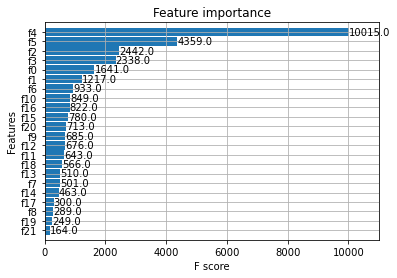

In [81]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [82]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

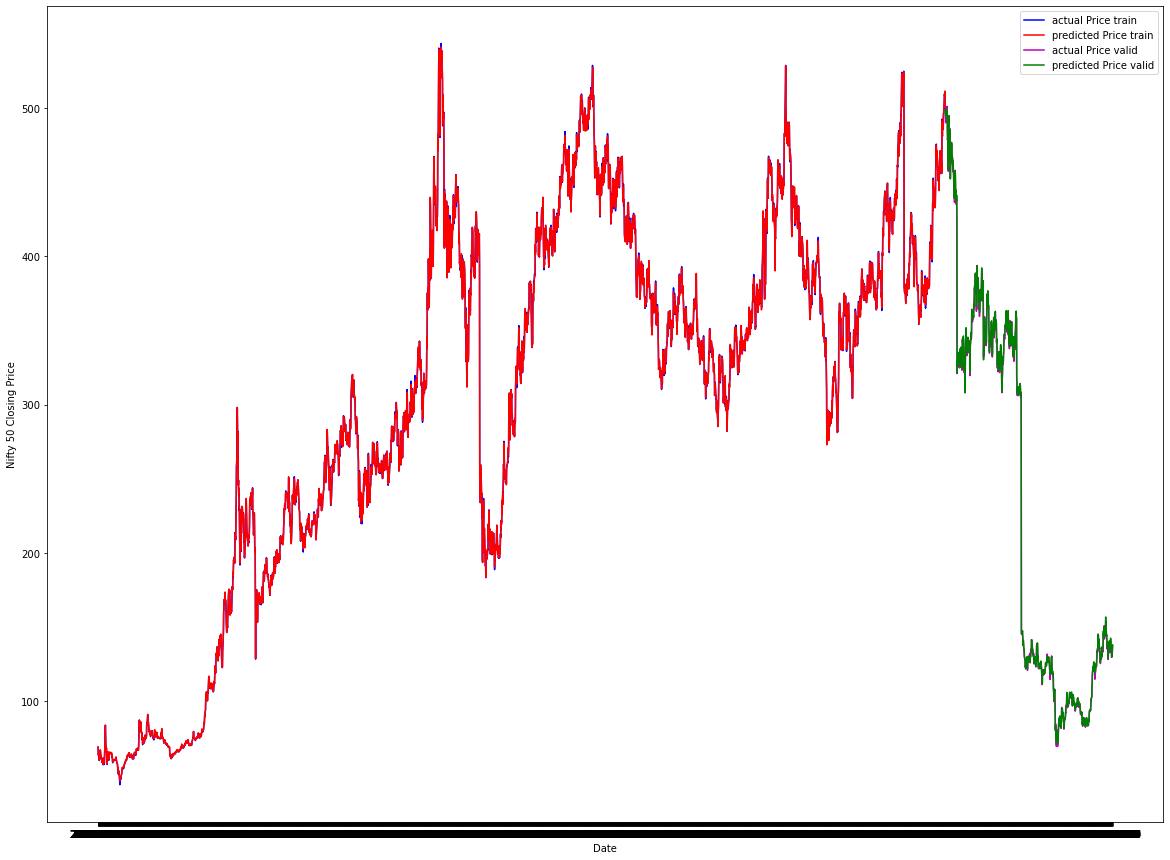

In [83]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

In [84]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
        eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
        early_stopping_rounds=100,
        verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:0.25004	validation_1-rmse:0.32518
[1]	validation_0-rmse:0.24758	validation_1-rmse:0.32205
[2]	validation_0-rmse:0.24514	validation_1-rmse:0.31894
[3]	validation_0-rmse:0.24273	validation_1-rmse:0.31588
[4]	validation_0-rmse:0.24035	validation_1-rmse:0.31284
[5]	validation_0-rmse:0.23798	validation_1-rmse:0.30983
[6]	validation_0-rmse:0.23564	validation_1-rmse:0.30685
[7]	validation_0-rmse:0.23333	validation_1-rmse:0.30390
[8]	validation_0-rmse:0.23103	validation_1-rmse:0.30098
[9]	validation_0-rmse:0.22876	validation_1-rmse:0.29808
[10]	validation_0-rmse:0.22651	validation_1-rmse:0.29522
[11]	validation_0-rmse:0.22429	validation_1-rmse:0.29237
[12]	validation_0-rmse:0.22208	validation_1-rmse:0.28957
[13]	validation_0-rmse:0.21990	validation_1-rmse:0.28678
[14]	validation_0-rmse:0.21774	validation_1-rmse:0.28401
[15]	validation_0-rmse:0.21560	validation_1-rmse:0.28128
[16]	validation_0-rmse:0.21348	validation_1-rmse:0.27857
[17]	validation_0-rmse:0.21138	validation

[144]	validation_0-rmse:0.06042	validation_1-rmse:0.07923
[145]	validation_0-rmse:0.05983	validation_1-rmse:0.07846
[146]	validation_0-rmse:0.05924	validation_1-rmse:0.07769
[147]	validation_0-rmse:0.05866	validation_1-rmse:0.07693
[148]	validation_0-rmse:0.05809	validation_1-rmse:0.07617
[149]	validation_0-rmse:0.05752	validation_1-rmse:0.07543
[150]	validation_0-rmse:0.05696	validation_1-rmse:0.07469
[151]	validation_0-rmse:0.05640	validation_1-rmse:0.07395
[152]	validation_0-rmse:0.05585	validation_1-rmse:0.07323
[153]	validation_0-rmse:0.05530	validation_1-rmse:0.07251
[154]	validation_0-rmse:0.05476	validation_1-rmse:0.07179
[155]	validation_0-rmse:0.05422	validation_1-rmse:0.07109
[156]	validation_0-rmse:0.05369	validation_1-rmse:0.07039
[157]	validation_0-rmse:0.05317	validation_1-rmse:0.06970
[158]	validation_0-rmse:0.05264	validation_1-rmse:0.06902
[159]	validation_0-rmse:0.05213	validation_1-rmse:0.06834
[160]	validation_0-rmse:0.05162	validation_1-rmse:0.06767
[161]	validati

[286]	validation_0-rmse:0.01504	validation_1-rmse:0.01973
[287]	validation_0-rmse:0.01490	validation_1-rmse:0.01954
[288]	validation_0-rmse:0.01475	validation_1-rmse:0.01935
[289]	validation_0-rmse:0.01461	validation_1-rmse:0.01916
[290]	validation_0-rmse:0.01447	validation_1-rmse:0.01898
[291]	validation_0-rmse:0.01433	validation_1-rmse:0.01880
[292]	validation_0-rmse:0.01419	validation_1-rmse:0.01862
[293]	validation_0-rmse:0.01405	validation_1-rmse:0.01844
[294]	validation_0-rmse:0.01392	validation_1-rmse:0.01827
[295]	validation_0-rmse:0.01379	validation_1-rmse:0.01809
[296]	validation_0-rmse:0.01365	validation_1-rmse:0.01792
[297]	validation_0-rmse:0.01352	validation_1-rmse:0.01775
[298]	validation_0-rmse:0.01339	validation_1-rmse:0.01758
[299]	validation_0-rmse:0.01326	validation_1-rmse:0.01741
[300]	validation_0-rmse:0.01313	validation_1-rmse:0.01724
[301]	validation_0-rmse:0.01301	validation_1-rmse:0.01708
[302]	validation_0-rmse:0.01288	validation_1-rmse:0.01692
[303]	validati

[428]	validation_0-rmse:0.00396	validation_1-rmse:0.00578
[429]	validation_0-rmse:0.00393	validation_1-rmse:0.00574
[430]	validation_0-rmse:0.00389	validation_1-rmse:0.00570
[431]	validation_0-rmse:0.00386	validation_1-rmse:0.00566
[432]	validation_0-rmse:0.00382	validation_1-rmse:0.00563
[433]	validation_0-rmse:0.00379	validation_1-rmse:0.00559
[434]	validation_0-rmse:0.00375	validation_1-rmse:0.00556
[435]	validation_0-rmse:0.00372	validation_1-rmse:0.00552
[436]	validation_0-rmse:0.00369	validation_1-rmse:0.00549
[437]	validation_0-rmse:0.00366	validation_1-rmse:0.00545
[438]	validation_0-rmse:0.00362	validation_1-rmse:0.00542
[439]	validation_0-rmse:0.00359	validation_1-rmse:0.00539
[440]	validation_0-rmse:0.00356	validation_1-rmse:0.00535
[441]	validation_0-rmse:0.00353	validation_1-rmse:0.00532
[442]	validation_0-rmse:0.00350	validation_1-rmse:0.00529
[443]	validation_0-rmse:0.00347	validation_1-rmse:0.00526
[444]	validation_0-rmse:0.00344	validation_1-rmse:0.00523
[445]	validati

[570]	validation_0-rmse:0.00122	validation_1-rmse:0.00360
[571]	validation_0-rmse:0.00121	validation_1-rmse:0.00359
[572]	validation_0-rmse:0.00120	validation_1-rmse:0.00359
[573]	validation_0-rmse:0.00119	validation_1-rmse:0.00359
[574]	validation_0-rmse:0.00119	validation_1-rmse:0.00358
[575]	validation_0-rmse:0.00118	validation_1-rmse:0.00358
[576]	validation_0-rmse:0.00117	validation_1-rmse:0.00358
[577]	validation_0-rmse:0.00116	validation_1-rmse:0.00358
[578]	validation_0-rmse:0.00115	validation_1-rmse:0.00357
[579]	validation_0-rmse:0.00114	validation_1-rmse:0.00357
[580]	validation_0-rmse:0.00114	validation_1-rmse:0.00357
[581]	validation_0-rmse:0.00113	validation_1-rmse:0.00357
[582]	validation_0-rmse:0.00112	validation_1-rmse:0.00356
[583]	validation_0-rmse:0.00111	validation_1-rmse:0.00356
[584]	validation_0-rmse:0.00110	validation_1-rmse:0.00356
[585]	validation_0-rmse:0.00110	validation_1-rmse:0.00356
[586]	validation_0-rmse:0.00109	validation_1-rmse:0.00355
[587]	validati

[712]	validation_0-rmse:0.00057	validation_1-rmse:0.00350
[713]	validation_0-rmse:0.00057	validation_1-rmse:0.00350
[714]	validation_0-rmse:0.00056	validation_1-rmse:0.00350
[715]	validation_0-rmse:0.00056	validation_1-rmse:0.00351
[716]	validation_0-rmse:0.00056	validation_1-rmse:0.00351
[717]	validation_0-rmse:0.00056	validation_1-rmse:0.00351
[718]	validation_0-rmse:0.00056	validation_1-rmse:0.00351
[719]	validation_0-rmse:0.00056	validation_1-rmse:0.00351
[720]	validation_0-rmse:0.00056	validation_1-rmse:0.00351
[721]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[722]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[723]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[724]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[725]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[726]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[727]	validation_0-rmse:0.00055	validation_1-rmse:0.00351
[728]	validation_0-rmse:0.00054	validation_1-rmse:0.00351
[729]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0099, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

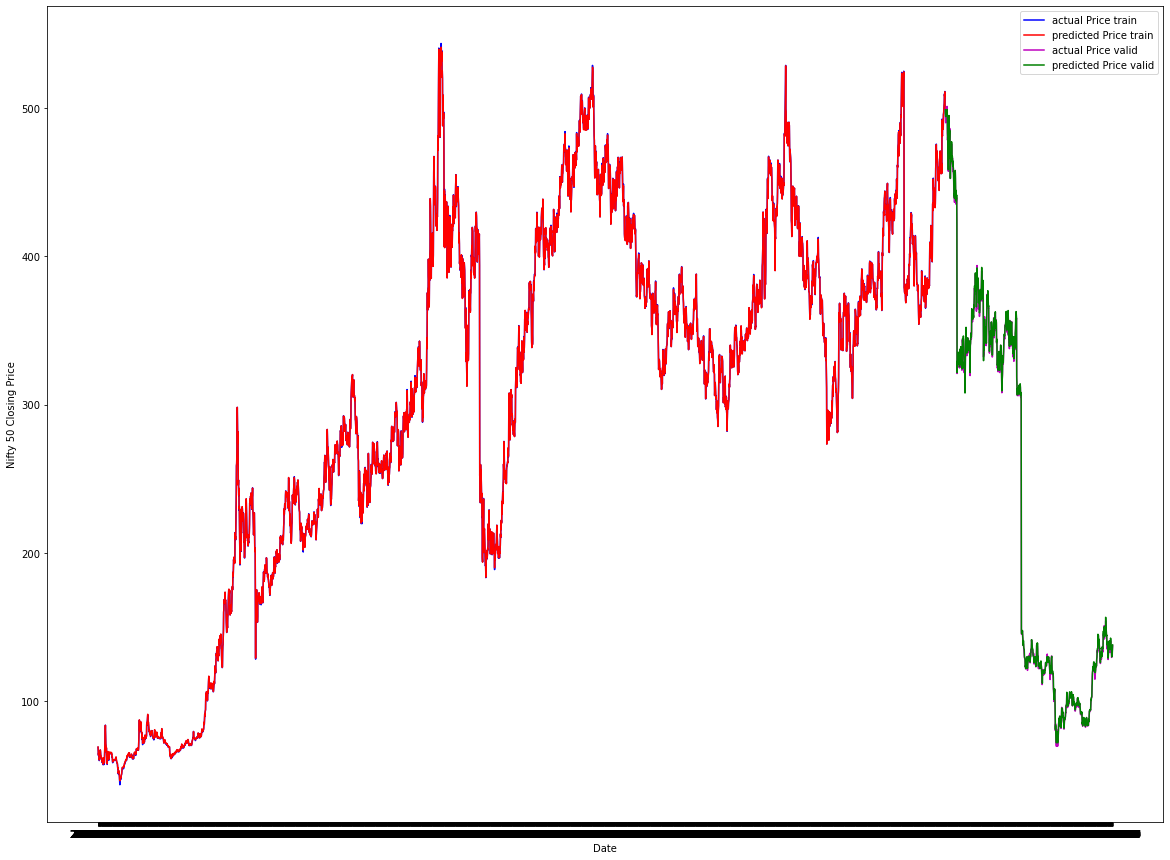

In [86]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()